In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


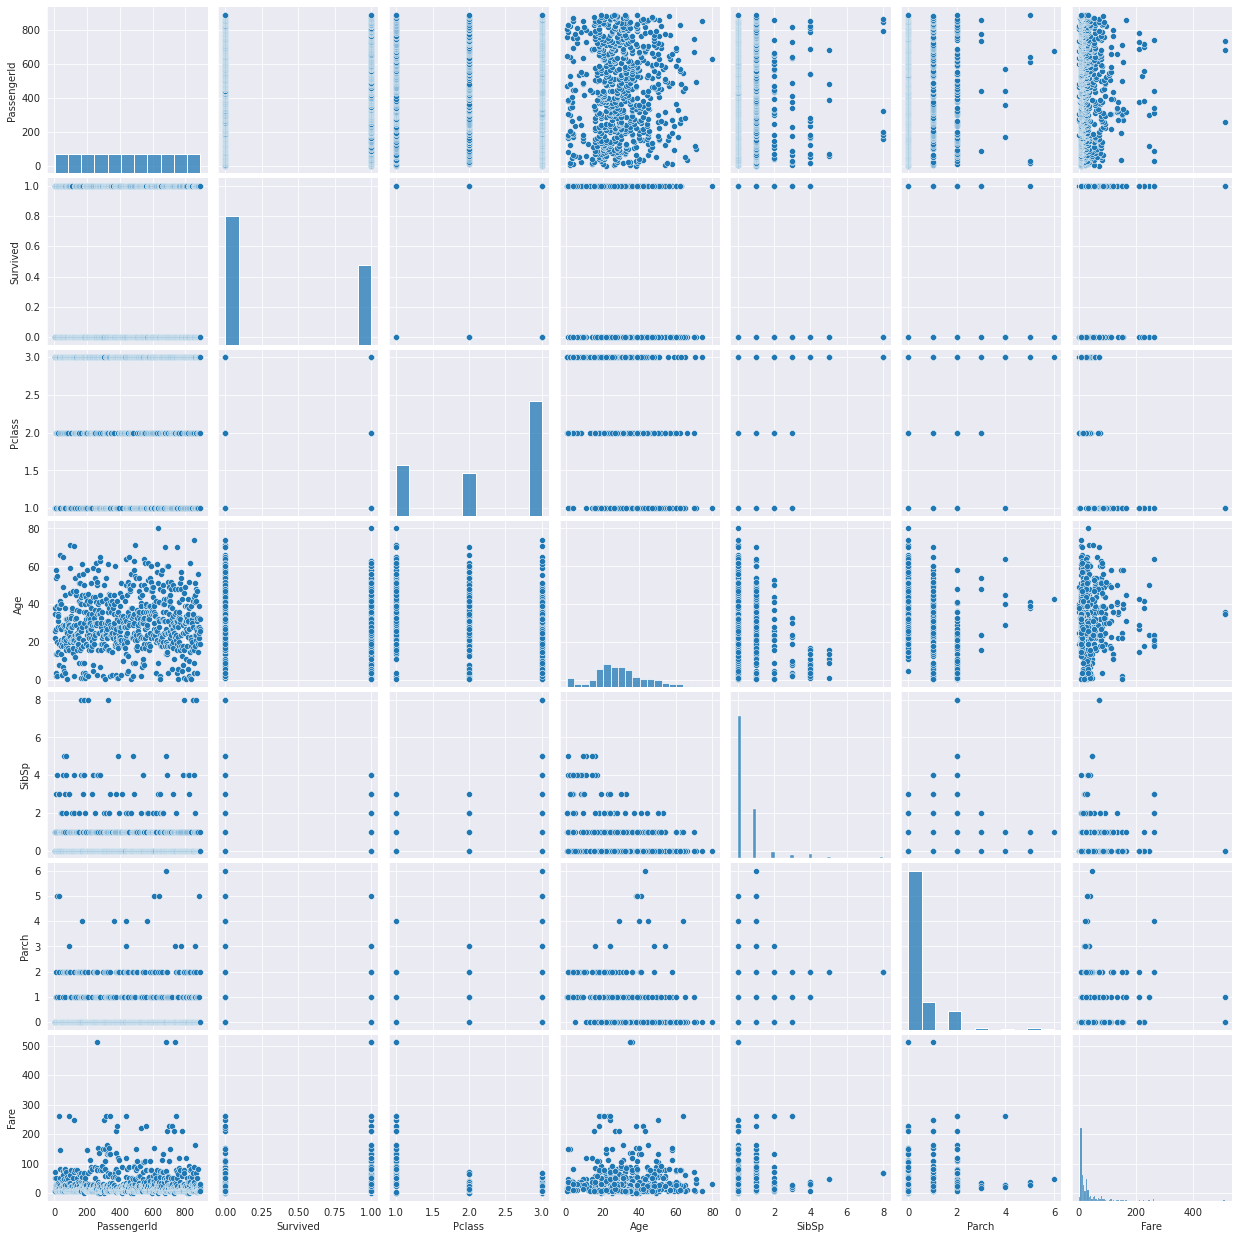

In [4]:
sns.pairplot(train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

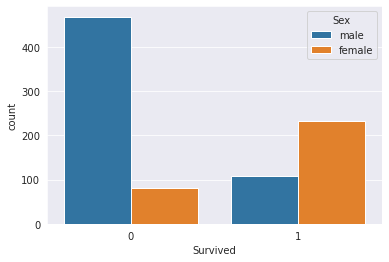

In [5]:
sns.countplot(data=train_data, x='Survived', hue='Sex')

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

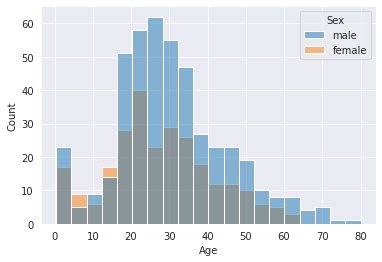

In [8]:
sns.histplot(data=train_data, x='Age', hue='Sex')

Text(0.5, 1.0, 'Age of Men on Board')

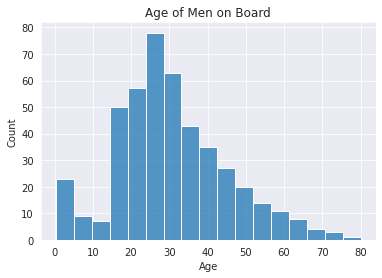

In [9]:
g = sns.histplot(data=train_data[train_data['Sex'] == 'male'], x='Age')
g.set_title('Age of Men on Board')

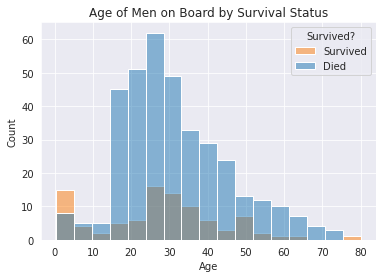

In [10]:
g = sns.histplot(data=train_data[train_data['Sex'] == 'male'], x='Age', hue='Survived', legend=False)
g.set_title('Age of Men on Board by Survival Status')
g.legend(title='Survived?', loc='upper right', labels=['Survived', 'Died'])

Text(0.5, 1.0, 'Age of Men on Board by Class')

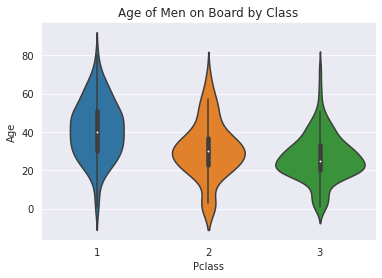

In [11]:
g = sns.violinplot(data=train_data[train_data['Sex'] == 'male'], x='Pclass', y='Age', legend=True)
g.set_title('Age of Men on Board by Class')

## Fill in null ages with the median age of males of that Pclass

In [12]:
train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 1)]['Age'].median()

40.0

In [13]:
train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 1)]['Age']

6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
839     NaN
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 122, dtype: float64

In [14]:
train_data.loc[(train_data['Sex'] == 'male') & (train_data['Pclass'] ==1) & (train_data['Age'].isnull()), 'Age'] = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 1)]['Age'].median()

In [15]:
train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 1)]['Age'].isnull()

6      False
23     False
27     False
30     False
34     False
       ...  
839    False
857    False
867    False
872    False
889    False
Name: Age, Length: 122, dtype: bool

In [16]:
train_data.loc[(train_data['Sex'] == 'male') & (train_data['Pclass'] ==2) & (train_data['Age'].isnull()), 'Age'] = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 2)]['Age'].median()
train_data.loc[(train_data['Sex'] == 'male') & (train_data['Pclass'] ==3) & (train_data['Age'].isnull()), 'Age'] = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 3)]['Age'].median()

## Female Ages and Survival Rates

Text(0.5, 1.0, 'Age of Women on Board')

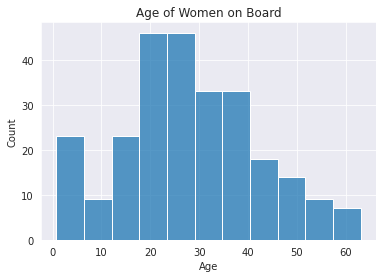

In [17]:
g = sns.histplot(data=train_data[train_data['Sex'] == 'female'], x='Age')
g.set_title('Age of Women on Board')

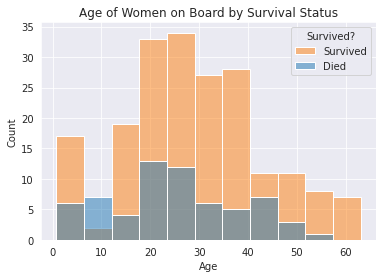

In [18]:
g = sns.histplot(data=train_data[train_data['Sex'] == 'female'], x='Age', hue='Survived', legend=False)
g.set_title('Age of Women on Board by Survival Status')
g.legend(title='Survived?', loc='upper right', labels=['Survived', 'Died'])

Text(0.5, 1.0, 'Age of Women on Board by Class')

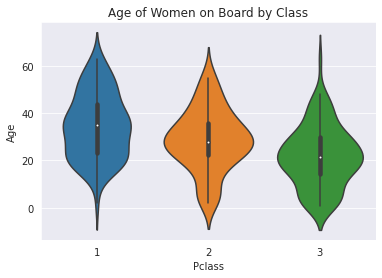

In [19]:
g = sns.violinplot(data=train_data[train_data['Sex'] == 'female'], x='Pclass', y='Age', legend=True)
g.set_title('Age of Women on Board by Class')

## Fill in null ages with the median age of males of that Pclass

In [20]:
train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 1)]['Age'].median()

35.0

In [21]:
train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 1)]['Age']

1      38.0
3      35.0
11     58.0
31      NaN
52     49.0
       ... 
856    45.0
862    48.0
871    47.0
879    56.0
887    19.0
Name: Age, Length: 94, dtype: float64

In [22]:
train_data.loc[(train_data['Sex'] == 'female') & (train_data['Pclass'] ==1) & (train_data['Age'].isnull()), 'Age'] = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 1)]['Age'].median()

In [23]:
train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 1)]['Age'].isnull()

1      False
3      False
11     False
31     False
52     False
       ...  
856    False
862    False
871    False
879    False
887    False
Name: Age, Length: 94, dtype: bool

In [24]:
train_data.loc[(train_data['Sex'] == 'female') & (train_data['Pclass'] ==2) & (train_data['Age'].isnull()), 'Age'] = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 2)]['Age'].median()
train_data.loc[(train_data['Sex'] == 'female') & (train_data['Pclass'] ==3) & (train_data['Age'].isnull()), 'Age'] = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 3)]['Age'].median()

In [25]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [26]:
train_data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Embarked                       NaN
Name: 61, dtype: object

In [27]:
train_data.drop(61, inplace=True)

In [28]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       1
dtype: int64

In [29]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [30]:
train_data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Embarked                                             NaN
Name: 829, dtype: object

In [31]:
train_data.drop(829, inplace=True)

In [32]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Test Data Prep

In [33]:
test_data = pd.read_csv('test.csv')

In [34]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test_data.drop('Cabin', axis=1, inplace=True)

In [36]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [37]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [38]:
test_data.loc[(test_data['Sex'] == 'male') & (test_data['Pclass'] ==1) & (test_data['Age'].isnull()), 'Age'] = test_data[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 1)]['Age'].median()
test_data.loc[(test_data['Sex'] == 'male') & (test_data['Pclass'] ==2) & (test_data['Age'].isnull()), 'Age'] = test_data[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 2)]['Age'].median()
test_data.loc[(test_data['Sex'] == 'male') & (test_data['Pclass'] ==3) & (test_data['Age'].isnull()), 'Age'] = test_data[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 3)]['Age'].median()

test_data.loc[(test_data['Sex'] == 'female') & (test_data['Pclass'] ==1) & (test_data['Age'].isnull()), 'Age'] = test_data[(test_data['Sex'] == 'female') & (test_data['Pclass'] == 1)]['Age'].median()
test_data.loc[(test_data['Sex'] == 'female') & (test_data['Pclass'] ==2) & (test_data['Age'].isnull()), 'Age'] = test_data[(test_data['Sex'] == 'female') & (test_data['Pclass'] == 2)]['Age'].median()
test_data.loc[(test_data['Sex'] == 'female') & (test_data['Pclass'] ==3) & (test_data['Age'].isnull()), 'Age'] = test_data[(test_data['Sex'] == 'female') & (test_data['Pclass'] == 3)]['Age'].median()

In [39]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [40]:
test_data.loc[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [41]:
test_data[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 3)]['Fare'].median()

7.8958

In [42]:
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = test_data[(test_data['Sex'] == 'male') & (test_data['Pclass'] == 3)]['Fare'].median()

In [43]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Machine Learning

### Dummy Variable Setup

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [46]:
train_data['male'] = pd.get_dummies(train_data['Sex'], drop_first=True)

In [47]:
test_data['male'] = pd.get_dummies(test_data['Sex'], drop_first=True)

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [49]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [50]:
train_data = train_data.join(pd.get_dummies(train_data['Embarked'], drop_first=True))

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [52]:
test_data = test_data.join(pd.get_dummies(test_data['Embarked'], drop_first=True))

In [53]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


### Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
X_train = train_data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)


In [56]:
logistic_func = LogisticRegression(max_iter=1000)

In [57]:
logistic_func.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_test = logistic_func.predict(X_test)

In [59]:
test_data['Predicted Survival'] = y_test

In [60]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Predicted Survival
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,1


In [61]:
test_data['Survived'] = test_data['Predicted Survival']

In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Predicted Survival,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,1,1


In [80]:
submissions_df = test_data.filter(['PassengerId', 'Survived'], axis=1)

In [81]:
submissions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [82]:
submissions_df.to_csv('submission.csv', index=False)